# Ch4: Tensors Structures and Modelling Applications


## 4.1.1 CANDECOMP/PARAFAC (CP)

In [2]:
import numpy as np
import tensorly as tl
from tensorly import random
from tensorly.decomposition import CP

N = 10

U =  random.random_tensor((N, N, N))
CP(U)

Rank-[[[0.76389829 0.02364613 0.41064958 0.82446287 0.46138848 0.74587969
   0.92223856 0.27640092 0.43696134 0.38457026]
  [0.14048935 0.36341059 0.59517335 0.86343332 0.33706672 0.67155649
   0.366613   0.55348133 0.4311535  0.88700968]
  [0.91443047 0.86982164 0.63890544 0.79235761 0.21860914 0.15053022
   0.77865382 0.05231698 0.3786277  0.47673366]
  [0.44637686 0.40932327 0.89451006 0.14914729 0.00986505 0.6778438
   0.63000821 0.7738294  0.57034061 0.22539118]
  [0.74032294 0.91712773 0.70337492 0.29100256 0.20995356 0.769377
   0.69492102 0.73242512 0.2333753  0.84288895]
  [0.6206838  0.85957148 0.45889184 0.22370018 0.07469852 0.19156937
   0.32334148 0.84554823 0.48819663 0.26811121]
  [0.13608267 0.16371555 0.40037883 0.3621655  0.62997096 0.55784021
   0.55087678 0.93332954 0.39750587 0.7047044 ]
  [0.87864581 0.13648752 0.60592419 0.46347573 0.91933972 0.86614014
   0.80842975 0.67500407 0.16716192 0.71291076]
  [0.28925629 0.11074767 0.90462488 0.06403747 0.42167923 0.14

In [3]:
rank = N/2
cp = CP(rank=rank) # with reduced rank, half compression
weights, factors = cp.fit_transform(U)
len(weights)

167

In [4]:
len(factors)

3

In [5]:
[f.shape for f in factors]

[(10, 167), (10, 167), (10, 167)]

In [ ]:
[f.shape for f in factors]

In [6]:
import math
reconstruction_t = tl.cp_to_tensor((weights, factors))

CP_RMSE = math.sqrt(np.square(np.subtract(U,reconstruction_t)).mean() )
print ("CP RMSE  for rank " + str(rank) + " RMSE = ", CP_RMSE)

CP RMSE  for rank 5.0 RMSE =  7.735906863407887e-12


In [7]:
rank = int(N/3)
cp = CP(rank=rank) # with higher compression
weights, factors = cp.fit_transform(U)
reconstruction_t = tl.cp_to_tensor((weights, factors))

CP_RMSE = math.sqrt(np.square(np.subtract(U,reconstruction_t)).mean() )
print ("CP RMSE  for rank " + str(rank) + " RMSE = ", CP_RMSE) # higher error

CP RMSE  for rank 3 RMSE =  0.26929487083959625


## 4.1.2 Tucker Decomposition

In [8]:
from tensorly.decomposition import tucker

rank=[N/2, N/2, N/2]
core, factors = tucker(U, rank=rank)# half compression
core.shape

(5, 5, 5)

In [9]:
[f.shape for f in factors]

[(10, 5), (10, 5), (10, 5)]

In [10]:
regeneratedTucker_tensor = tl.tucker_to_tensor((core, factors))
print(regeneratedTucker_tensor.shape)
Tucker_RMSE =math.sqrt(np.square(np.subtract(U, regeneratedTucker_tensor).mean()))
print ("Tucker   for rank " + str(rank) + " RMSE = ", Tucker_RMSE) 

(10, 10, 10)
Tucker   for rank [5.0, 5.0, 5.0] RMSE =  8.52845528130588e-05


In [11]:
rank=[int(N/3), int(N/3), int(N/2)]
core, factors = tucker(U, rank=rank)# more compression
regeneratedTucker_tensor = tl.tucker_to_tensor((core, factors))
print(regeneratedTucker_tensor.shape)
Tucker_RMSE =math.sqrt(np.square(np.subtract(U, regeneratedTucker_tensor).mean()))
print ("Tucker   for rank " + str(rank) + " RMSE = ", Tucker_RMSE) # higher error

(10, 10, 10)
Tucker   for rank [3, 3, 5] RMSE =  8.297507820321082e-05


## 4.2 Tensor Graphical Notation  


<img src="TestNetwork.png">
This Network of Tensors Network is created in https://www.tensortrace.com/, the code below optimises the search for network contractions using ncon function ("Network CONtractor").  ncon is also implemented in Google TensorNetworks: https://github.com/google/TensorNetwork. 

TensorTrace is programmed to accept 4 networks, each network consists of any number of tensors, each tensor can have any number of indices. To be able to contract them into one tensor or scalar. The above complicated tensor network is contracted to a scaller, since all indices are connected together (summation/contraction indices) . **I could not understand how they group indices into 5 groups, and create the variable names as shown in the following tensortrace generate Python code - I contacted them and hopefully they will calrify before publishing the book** . A network made up of multiple tensors connected by summed indices is reduced to a single tensor or a number by evaluating the index sums.

In [43]:
!pip install ncon 

In [44]:
import numpy as np 
from ncon import ncon 
# from tensornetwork import ncon 
# --------------- Network-1 --------------- # 
# Leading order cost (guaranteed optimal): (Ind1^13)*(Ind2^5)
Ind1 = 2
Ind2 = 2
Ind5 = 2
T1 = np.random.rand(Ind2,Ind1,Ind1,Ind1,Ind5,Ind1,Ind1,Ind2)
T2 = np.random.rand(Ind2,Ind1,Ind1,Ind1,Ind2,Ind1,Ind1,Ind1,Ind1,Ind2,Ind1)
T3 = np.random.rand(Ind2,Ind1,Ind1,Ind1,Ind2,Ind1,Ind1,Ind1,Ind1,Ind1,Ind2,Ind1)
T4 = np.random.rand(Ind1,Ind2,Ind1,Ind5,Ind1,Ind1,Ind1,Ind1,Ind2,Ind2,Ind2)

# TTv1.0.5.0P$9-*@,J0O5J6@5501,52ICLHNNRPUNWHZCW=L<R5N8F6a6e:h@hFhJeJaJ]F[@[:
# [6]0>9?>@C@HADB@C7D4=4@4?4,((3''..))).*().)()'.IX'\JKDUMW.]KNITST4SNRRTVH5(
# GQOLQLJ0VUXLR]PnYHYTV_Rt_JXZPP[9RRRRFQG'\Q\QTR5qNPNPWO=SLVRZ$
tensors = [T1,T2,T3,T4]
connects = [[1,2,8,8,5,6,3,21],[11,13,14,15,16,17,18,18,19,20,4],
	[1,12,12,17,16,15,14,13,10,9,7,2],[3,7,6,5,9,10,19,4,21,11,20]]
con_order = [8,18,12,13,14,15,16,17,11,19,20,4,10,9,7,1,2,5,6,3,21]
T1 = ncon(tensors,connects,con_order) # "Network CONtractor"


In [45]:
T1

array(126596.39263487)

In [46]:
T1.shape

()

The gamemaker studio output details are as follows:

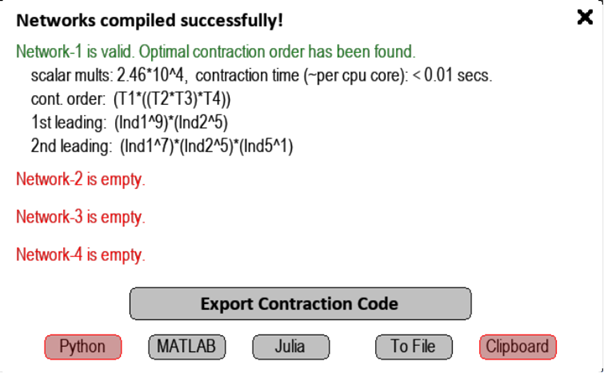

The above generated Python code does not print out the contraction order shown in the image. The ncon function as well returns only the contracted ndarray tensor but does not give out all details in this image, which is great in taking this code into simulating tensor networks and understanding the contraction performance. 

Is there a way to get the number of scalar multiplications in python, the tensor contraction order and the other details shown in the image below? if this is not readily available in these libraries, (the authors might reply with answers), then this makes a good MSc project idea to release more details about the simulation, and try different methods. 

Tensor trace obviously hard code the graphical user input into the Python code. 

Another example that contracts to 2-way tensor (2 free indices are created) is as follows:

<img src="TestNetwork2.png">



The optimal contraction Order is:  [2,1,4,3]

In [47]:
# --------------- Network-1 --------------- # 
# Leading order cost (guaranteed optimal): (Ind1^5)
Ind1 = 2
T0 = np.random.rand(Ind1,Ind1,Ind1,Ind1)
T1 = np.random.rand(Ind1,Ind1,Ind1)
T2 = np.random.rand(Ind1,Ind1,Ind1)

# TTv1.0.5.0P$T<,82H2'-I.9N>_>=@GeKuKT'''''''SSl$
tensors = [T0,T1,T2]
connects = [[4,2,1,-2],[1,2,3],[3,-1,4]]
con_order = [2,1,4,3]
T1 = ncon(tensors,connects,con_order)
T1.shape

(2, 2)

In [48]:
T1

array([[1.45346387, 1.68893414],
       [1.55504724, 1.72256614]])

Another example that contracts to 3-way tensor (3 free indices are created) is as follows:

<img src="TestNetwork3.png">
The optimal contraction Order is:[2,1,3]

In [49]:
# --------------- Network-1 --------------- # 
# Leading order cost (guaranteed optimal): (Ind1^4)
Ind1 = 2
T0 = np.random.rand(Ind1,Ind1,Ind1)
T1 = np.random.rand(Ind1,Ind1,Ind1)
T2 = np.random.rand(Ind1,Ind1,Ind1)

# TTv1.0.5.0P$U*28?G@(0LJY^Y6.c^popM'')'''':{k}K$
tensors = [T0,T1,T2]
connects = [[-3,2,1],[2,3,1],[3,-2,-1]]
con_order = [2,1,3]
T1 = ncon(tensors,connects,con_order)
T1.shape


(2, 2, 2)

In [50]:
T1

array([[[1.34586949, 1.27159154],
        [0.50705741, 0.52421329]],

       [[1.28039365, 1.11050855],
        [1.03176317, 0.86728339]]])

Another example that contracts to 4-way tensor (4 free indices are created) is as follows:
<img src="TestNetwork4.png">


The optimal contraction Order is: [2,1,3,4]


In [51]:
# --------------- Network-1 --------------- # 
# Leading order cost (guaranteed optimal): (Ind1^5)
Ind1 = 2
T0 = np.random.rand(Ind1,Ind1,Ind1)
T1 = np.random.rand(Ind1,Ind1,Ind1)
T2 = np.random.rand(Ind1,Ind1,Ind1)
T3 = np.random.rand(Ind1,Ind1,Ind1)

# TTv1.0.5.0P$B,,92C2/>8>>J>30C?LML0EQ\XiXN'''''''''9N'[n\G$
tensors = [T0,T1,T2,T3]
connects = [[-1,2,1],[1,2,3],[3,4,-2],[4,-4,-3]]
con_order = [2,1,3,4]
T1 = ncon(tensors,connects,con_order)
T1.shape


(2, 2, 2, 2)

## 4.2.1 The Tensor Train Decomposition

In [53]:

from tensorly.decomposition import matrix_product_state

rank = list(T1.shape) # full rank : boundaring conditions dictatate rank[0] == rank[-1] == 1: setting rank[0] to 1.
rank[0] = 1
rank.append(1) # boundaring conditions dictatate rank[0] == rank[-1] == 1: setting rank[0] to 1.
factors = matrix_product_state(T1, rank=rank)

[f.shape for f in factors]


[(1, 2, 2), (2, 2, 2), (2, 2, 2), (2, 2, 1)]

In [54]:
from tensorly import tt_to_tensor

reconstruction_t = np.round(tt_to_tensor(factors), decimals=10)
reconstruction_t

array([[[[1.01619903, 1.11245758],
         [0.30639639, 0.97319392]],

        [[0.81253976, 0.89205887],
         [0.24767257, 0.78259668]]],


       [[[1.8293858 , 2.00411737],
         [0.55310029, 1.7544822 ]],

        [[1.47286976, 1.61984617],
         [0.45192814, 1.42352728]]]])

In [55]:
import math

MPS_RMSE = math.sqrt(np.square(np.subtract(T1,reconstruction_t)).mean() )
print ("MPS RMSE  for rank " + str(rank) + " RMSE = ", MPS_RMSE)

MPS RMSE  for rank [1, 2, 2, 2, 1] RMSE =  2.797548853035411e-11


In [56]:
from tensorly.decomposition import TensorTrain
import tensorly as tl


tt = TensorTrain (T1, verbose=True)
tt.fit_transform(T1) # I asked them about this error, if they resolve, will correct, otherwise, I will remove in an upcoming revision

C:\ProgramData\Anaconda3\lib\site-packages\tensorly\tt_tensor.py:187: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if rank == 'same':


ValueError: Provided incorrect number of ranks. Should verify len(rank) == tl.ndim(tensor)+1, but len(rank) = 2 while tl.ndim(tensor) + 1  = 5

In [57]:
tl.tt_tensor

<module 'tensorly.tt_tensor' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorly\\tt_tensor.py'>

In [58]:
rank

[1, 2, 2, 2, 1]

In [59]:
tt.rank

array([[[[1.01619903, 1.11245758],
         [0.30639639, 0.97319392]],

        [[0.81253976, 0.89205887],
         [0.24767257, 0.78259668]]],


       [[[1.8293858 , 2.00411737],
         [0.55310029, 1.7544822 ]],

        [[1.47286976, 1.61984617],
         [0.45192814, 1.42352728]]]])

In [60]:
T1

array([[[[1.01619903, 1.11245758],
         [0.30639639, 0.97319392]],

        [[0.81253976, 0.89205887],
         [0.24767257, 0.78259668]]],


       [[[1.8293858 , 2.00411737],
         [0.55310029, 1.7544822 ]],

        [[1.47286976, 1.61984617],
         [0.45192814, 1.42352728]]]])

In [61]:
from tensorly import tt_tensor

In [62]:
from tensorly.contrib.decomposition import tensor_train_cross
factors2 = tensor_train_cross(T1, rank)
[f.shape for f in factors2]

[(1, 2, 2), (2, 2, 2), (2, 2, 2), (2, 2, 1)]

In [63]:
factors2 == factors

False

In [64]:
factors2

[array([[[0.78259668, 1.01619903],
         [1.42352728, 1.8293858 ]]]),
 array([[[-1.55344925e-17,  1.71360091e-01],
         [ 6.89210987e-01,  1.00000000e+00]],
 
        [[ 1.00000000e+00,  8.25712346e-01],
         [ 2.68811052e-01, -5.22023632e-17]]]),
 array([[[ 1.00000000e+00,  5.44676741e-01],
         [-2.76540677e-01,  2.04512317e-17]],
 
        [[ 3.18849242e-17,  5.74353774e-01],
         [ 6.03596818e-01,  1.00000000e+00]]]),
 array([[[ 1.00000000e+00],
         [-3.13308551e-17]],
 
        [[-5.06683654e-17],
         [ 1.00000000e+00]]])]

In [65]:
reconstruction_t = np.round(tt_to_tensor(factors2), decimals=10)
reconstruction_t

TT_RMSE = math.sqrt(np.square(np.subtract(T1,reconstruction_t)).mean() )
print ("TT   for rank " + str(rank) + " RMSE = ", TT_RMSE)

TT   for rank [1, 2, 2, 2, 1] RMSE =  2.797548853035411e-11


In [66]:
MPS_RMSE

2.797548853035411e-11

In [67]:
TT_RMSE > MPS_RMSE

False

In [68]:
#!pip install git+https://github.com/PGelss/scikit_tt

  Cloning https://github.com/PGelss/scikit_tt to c:\users\dell precision\appdata\local\temp\pip-req-build-z97rbw8h
  Resolved https://github.com/PGelss/scikit_tt to commit 2ead9c4872cd865f7770f8f3a9274468b5b61b1f
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3


  Running command git clone -q https://github.com/PGelss/scikit_tt 'C:\Users\Dell Precision\AppData\Local\Temp\pip-req-build-z97rbw8h'
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~.mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [69]:
 from scikit_tt.tensor_train import TT

# this class rebuild a TT from the cores. It accepts cores in such a format of
#  a list of cores, i.e. "t = TT(cores)"  where cores is  given by a list of 4-dimensional tensors "[cores[0] , ..., cores[d-1]]",
# where cores[i] is an ndarry with dimensions "ranks[i] x row_dims[i] x col_dims[i] x ranks[i+1]"
# or from a full tensor representation, i.e. "t = TT(x)" where  x is an ndarray with dimensions  "row_dims[0] x ... x row_dims[-1] x col_dims[0] x ... x col_dims[-1]"



In [70]:
# we can read the previously generated cores iteratively
cores = []
for f in factors2:
    cores.append(f)
[f.shape for f in cores] # list of cores, but must be 4-dimensions each, so we can not use the ones generated by Tensorly

[(1, 2, 2), (2, 2, 2), (2, 2, 2), (2, 2, 1)]

In [71]:
# generating a TT from cores randonly generated as requested by scikit_tt
cores = [np.random.rand(1, 2, 3, 4), np.random.rand(4, 3, 2, 1)] # random cores
t = TT(cores)
print(t)


Tensor train with order    = 2, 
                  row_dims = [2, 3], 
                  col_dims = [3, 2], 
                  ranks    = [1, 4, 1]


In [72]:
type(t)

scikit_tt.tensor_train.TT

In [73]:
# conversion from TT format into QTT format.
t_qtt = t.tt2qtt
t_qtt

<bound method TT.tt2qtt of 
Tensor train with order    = 2, 
                  row_dims = [2, 3], 
                  col_dims = [3, 2], 
                  ranks    = [1, 4, 1]>

In [74]:
tensor = np.random.rand(1, 2, 3, 4, 5, 6) #  can also construct TT from numpy ndarray as a ful tensor, this is 6-way tensor
tensor.shape

(1, 2, 3, 4, 5, 6)

In [75]:
t = TT(tensor)
print (t)


Tensor train with order    = 3, 
                  row_dims = [1, 2, 3], 
                  col_dims = [4, 5, 6], 
                  ranks    = [1, 4, 18, 1]


In [76]:
# from a full tensor representation, the T1 4-way tensor used earlier, it is decomsed into rank [1, 4, 1], 
t = TT(T1) # we can 
print(t)


Tensor train with order    = 2, 
                  row_dims = [2, 2], 
                  col_dims = [2, 2], 
                  ranks    = [1, 4, 1]


In [85]:
#!pip install t3f

  Created wheel for t3f: filename=t3f-1.2.0-py3-none-any.whl size=69178 sha256=5d37f3bf7deea85231fc9f39d064b349deec8a0fdf52fe8c80da5300f9733550
  Stored in directory: c:\users\dell precision\appdata\local\pip\cache\wheels\19\ba\b6\4374128efd1e8839a677ff1114fb4e1f085d8274838d4bae1d
Successfully built t3f


In [87]:
import t3f

a_tt = t3f.to_tt_tensor(T1, max_tt_rank=2)
a_tt

In [89]:
a_tt.get_shape()

TensorShape([2, 2, 2, 2])

In [92]:
a_tt.get_tt_ranks()

TensorShape([1, 2, 2, 2, 1])

In [93]:
a_tt.tt_cores

(<tf.Tensor: shape=(1, 2, 2), dtype=float64, numpy=
 array([[[-0.48414987, -0.87498509],
         [-0.87498509,  0.48414987]]])>,
 <tf.Tensor: shape=(2, 2, 2), dtype=float64, numpy=
 array([[[-0.77823539,  0.60264037],
         [-0.6279705 , -0.74654427]],
 
        [[-0.00103675,  0.1289837 ],
         [ 0.00128434,  0.25071788]]])>,
 <tf.Tensor: shape=(2, 2, 2), dtype=float64, numpy=
 array([[[ 8.36718571e-01,  5.47622958e-01],
         [ 5.47631186e-01, -8.36713525e-01]],
 
        [[-6.85779218e-04, -4.33239183e-03],
         [ 1.28314080e-03,  8.96453352e-04]]])>,
 <tf.Tensor: shape=(2, 2, 1), dtype=float64, numpy=
 array([[[ 2.69324138],
         [ 3.87795479]],
 
        [[ 0.78785109],
         [-0.54716295]]])>)

In [96]:
[c.shape for c in a_tt.tt_cores]

[TensorShape([1, 2, 2]),
 TensorShape([2, 2, 2]),
 TensorShape([2, 2, 2]),
 TensorShape([2, 2, 1])]

In [97]:
reconstruction_t = t3f.full(a_tt)
T3f_TT_RMSE = math.sqrt(np.square(np.subtract(T1,reconstruction_t)).mean() )
print ("T3F TT   for rank " + str(rank) + " RMSE = ", T3f_TT_RMSE)

T3F TT   for rank [2, 2] RMSE =  3.694568430527454e-15


### 4.2.2 Tensor Rings 

so far I could not find a TR that works in isolation of NN layers. Even NN layers are not well explained in the tutorials how to use them. I have sent them emails and waiting for their reply, then will update this notebook with the final findings, whether there is, or there is not.

In [77]:
#!pip install tednet
#!pip install torch
#!pip install --upgrade numpy

In [107]:
import tednet as tdt

import tednet.tnn.tensor_ring as tr

rank=[2, 2]
model = tr.TRLinear(T1.shape, [2, 2], ranks=rank)
tn_type = "tr"
model.tn_info["type"] = tn_type

AssertionError: The number of ranks is not suitable.

In [80]:
T1.shape

(2, 2, 2, 2)

In [109]:
#from tednet.tnn import tn_module
from torch.nn.modules.module import Module

model = Module()
nodes_info = []
node_info = dict(name="node1", shape=[2, 3, 4])
nodes_info.append(node_info)
model.tn_info["nodes"] = nodes_info


AttributeError: 'Module' object has no attribute 'tn_info'

In [ ]:
for epoch in range(20):
    model.train(
        torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=128, shuffle=True, **kwargs)
        optim.SGD(model.parameters(), lr=2e-2, momentum=0.9, weight_decay=5e-4), 
        epoch
    )

In [ ]:
model.train?

## 4.3.1 Introduction to NN:

To keep code simpler, I tried to load the dataset once, and in every new model, updated its format as required by the new model. If anything goes wrong, all cells from next one, need to run in sequence

## Perceptron

In [1]:
import numpy as np 
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

digits = load_digits()  # consider binary case
X = digits.data
y = digits.target
print(X.shape)

C:\Users\Dell Precision\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(1797, 64)


In [2]:
from sklearn.model_selection import train_test_split

X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.4)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=0, test_size=0.5)


In [3]:
print (X_train.shape)
print (X_test.shape)
print (X_val.shape)

(1078, 64)
(359, 64)
(360, 64)


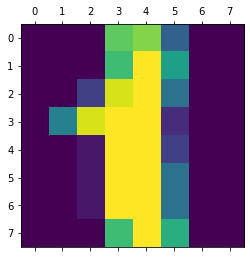

In [4]:
import matplotlib.pyplot as plt

plt.matshow(digits.images[1])

In [5]:
clf = Perceptron(tol=1e-3, random_state=0)
from time import time
start= time()
clf.fit(X, y)
p_learnTime= time()-start

In [6]:
print("Training set score: %f" % clf.score(X_train, y_train))
P_MNIST_score = clf.score(X_test, y_test)
print("Test set score: %f" % P_MNIST_score)

Training set score: 0.914657
Test set score: 0.908078


## Multi Layer Perceptron

In [7]:
from sklearn.neural_network import MLPClassifier

epochs = 8

mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=epochs,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)

start= time()
mlp.fit(X_train, y_train)
mlp_learnTime= time()-start

print("Training set score: %f" % mlp.score(X_train, y_train))
MLP_MNIST_score = mlp.score(X_test, y_test)
print("Test set score: %f" % MLP_MNIST_score)


Iteration 1, loss = 2.32083410
Iteration 2, loss = 2.30143372
Iteration 3, loss = 2.29487446
Iteration 4, loss = 2.28683077
Iteration 5, loss = 2.27889477
Iteration 6, loss = 2.27008412
Iteration 7, loss = 2.25852477
Iteration 8, loss = 2.24779170
Training set score: 0.320037
Test set score: 0.281337


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
#!pip install --upgrade tensorflow

In [9]:
import tensorflow as tf
#import  as tk
#from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes=num_classes) # NN encoding
y_test = to_categorical(y_test, num_classes=num_classes)
#from tf.keras import Input
#from tensorflow.keras.layers import Dense, Activation
#from tensorflow.keras.models import Model

xi = tf.keras.Input(shape=(X_train.shape[1],))
xo = tf.keras.layers.Dense(num_classes)(xi)
yo = tf.keras.layers.Activation('softmax')(xo)
model   =  tf.keras.models.Model(inputs=[xi], outputs=[yo])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


## Keras Fully Connected / Dense Model

In [10]:
batch_size = 128

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',  
              metrics=['accuracy'])

start= time()
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.1)

FC_learnTime= time()-start

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
FC_MNIST_score = score[1]
print('Test accuracy:', FC_MNIST_score)

Epoch 1/8
8/8 [==============================] - 0s 18ms/step - loss: 2.2918 - accuracy: 0.1485 - val_loss: 2.3010 - val_accuracy: 0.1111
Epoch 2/8
8/8 [==============================] - 0s 5ms/step - loss: 2.2882 - accuracy: 0.1649 - val_loss: 2.2978 - val_accuracy: 0.1204
Epoch 3/8
8/8 [==============================] - 0s 5ms/step - loss: 2.2848 - accuracy: 0.1701 - val_loss: 2.2944 - val_accuracy: 0.1111
Epoch 4/8
8/8 [==============================] - 0s 5ms/step - loss: 2.2812 - accuracy: 0.1845 - val_loss: 2.2912 - val_accuracy: 0.1111
Epoch 5/8
8/8 [==============================] - 0s 4ms/step - loss: 2.2779 - accuracy: 0.1918 - val_loss: 2.2879 - val_accuracy: 0.1204
Epoch 6/8
8/8 [==============================] - 0s 4ms/step - loss: 2.2743 - accuracy: 0.1969 - val_loss: 2.2850 - val_accuracy: 0.1296
Epoch 7/8
8/8 [==============================] - 0s 4ms/step - loss: 2.2709 - accuracy: 0.2010 - val_loss: 2.2819 - val_accuracy: 0.1389
Epoch 8/8
8/8 [=========================

## Keras CNN Model


In [11]:
# images are flattened to 64, will return to 28 x 28
# then add another dimension to make sure images have shape (8, 8, 1) for CNN

print(X_train.shape)
print(X_test.shape)
X_train = X_train.reshape((X_train.shape[0], 8, 8))
X_test = X_test.reshape((X_test.shape[0], 8, 8))
print(X_train.shape)
print(X_test.shape)

(1078, 64)
(359, 64)
(1078, 8, 8)
(359, 8, 8)


In [12]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)
print(X_test.shape)

(1078, 8, 8, 1)
(359, 8, 8, 1)


In [13]:

input_shape = (8, 8, 1)
# 32 channels, a kernel size of 5×5, a stride of (2, 2), and padding=’same’.
dropout = 0.2

model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(2,2), padding='same', activation="relu", kernel_initializer='he_normal', bias_initializer='zeros'),
        tf.keras.layers.Dropout(dropout),
        #tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        #tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 4, 4, 32)          320       
                                                                 
 dropout (Dropout)           (None, 4, 4, 32)          0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 5,450
Trainable params: 5,450
Non-trainable params: 0
_________________________________________________________________


In [14]:
X_train.shape

(1078, 8, 8, 1)

In [15]:

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start= time()
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
CNN_learnTime= time()-start

Epoch 1/8
8/8 [==============================] - 0s 18ms/step - loss: 2.2960 - accuracy: 0.1113 - val_loss: 2.2867 - val_accuracy: 0.1759
Epoch 2/8
8/8 [==============================] - 0s 6ms/step - loss: 2.2756 - accuracy: 0.2423 - val_loss: 2.2685 - val_accuracy: 0.3889
Epoch 3/8
8/8 [==============================] - 0s 6ms/step - loss: 2.2537 - accuracy: 0.3845 - val_loss: 2.2464 - val_accuracy: 0.4722
Epoch 4/8
8/8 [==============================] - 0s 6ms/step - loss: 2.2275 - accuracy: 0.4598 - val_loss: 2.2200 - val_accuracy: 0.5093
Epoch 5/8
8/8 [==============================] - 0s 6ms/step - loss: 2.1942 - accuracy: 0.5196 - val_loss: 2.1881 - val_accuracy: 0.5463
Epoch 6/8
8/8 [==============================] - 0s 5ms/step - loss: 2.1562 - accuracy: 0.5351 - val_loss: 2.1521 - val_accuracy: 0.5556
Epoch 7/8
8/8 [==============================] - 0s 6ms/step - loss: 2.1188 - accuracy: 0.5619 - val_loss: 2.1116 - val_accuracy: 0.6019
Epoch 8/8
8/8 [=========================

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
CNN_MNIST_score = score[1]
print("Test accuracy:", CNN_MNIST_score)

Test loss: 2.083078384399414
Test accuracy: 0.5543175339698792


## Keras RNN Model

In [34]:
# network parameters
input_shape = (8, 8) # image size
units = 32 # trying to achieve fair comparison, by having 32 RNN units, while we had 32 channel in CNN 

# model is RNN with 32 units, input is 8x8-dim 
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(tf.keras.layers.Dense(num_classes))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 32)                1312      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 1,642
Trainable params: 1,642
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# train the network

start= time()
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
RNN_learnTime= time()-start

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
RNN_MNIST_score = score[1]
print('Test accuracy:', RNN_MNIST_score)


Epoch 1/8
9/9 [==============================] - 0s 2ms/step - loss: 2.3102 - accuracy: 0.1076
Epoch 2/8
9/9 [==============================] - 0s 2ms/step - loss: 2.3079 - accuracy: 0.1002
Epoch 3/8
9/9 [==============================] - 0s 2ms/step - loss: 2.3077 - accuracy: 0.0918
Epoch 4/8
9/9 [==============================] - 0s 2ms/step - loss: 2.3076 - accuracy: 0.0733
Epoch 5/8
9/9 [==============================] - 0s 2ms/step - loss: 2.3047 - accuracy: 0.0770
Epoch 6/8
9/9 [==============================] - 0s 2ms/step - loss: 2.3041 - accuracy: 0.0937
Epoch 7/8
9/9 [==============================] - 0s 2ms/step - loss: 2.3035 - accuracy: 0.0779
Epoch 8/8
9/9 [==============================] - 0s 2ms/step - loss: 2.3025 - accuracy: 0.0631
Test loss: 2.309088945388794
Test accuracy: 0.033426184207201004


In [36]:
X_train.shape

(1078, 8, 8, 1)

## Keras LSTM Model

In [37]:
# model is LSTM with 32 units, input is 8x8-dim 
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(tf.keras.layers.Dense(num_classes))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                5248      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
 activation_4 (Activation)   (None, 10)                0         
                                                                 
Total params: 5,578
Trainable params: 5,578
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# train the network

start= time()
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
LSTM_learnTime= time()-start

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
LSTM_MNIST_score = score[1]
print('Test accuracy:', LSTM_MNIST_score)

Epoch 1/8
9/9 [==============================] - 1s 4ms/step - loss: 2.3017 - accuracy: 0.1113
Epoch 2/8
9/9 [==============================] - 0s 3ms/step - loss: 2.3017 - accuracy: 0.1169
Epoch 3/8
9/9 [==============================] - 0s 4ms/step - loss: 2.3015 - accuracy: 0.1169
Epoch 4/8
9/9 [==============================] - 0s 4ms/step - loss: 2.3014 - accuracy: 0.1169
Epoch 5/8
9/9 [==============================] - 0s 4ms/step - loss: 2.3014 - accuracy: 0.1058
Epoch 6/8
9/9 [==============================] - 0s 4ms/step - loss: 2.3012 - accuracy: 0.1252
Epoch 7/8
9/9 [==============================] - 0s 3ms/step - loss: 2.3013 - accuracy: 0.1085
Epoch 8/8
9/9 [==============================] - 0s 3ms/step - loss: 2.3012 - accuracy: 0.1122
Test loss: 2.303574562072754
Test accuracy: 0.08077994734048843


## Keras GRU Model

In [39]:
# model is GRU with 256 units, input is 28-dim vector 28 timesteps
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(tf.keras.layers.Dense(num_classes))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                4032      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 4,362
Trainable params: 4,362
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# train the network

start= time()
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
GRU_learnTime= time()-start

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
GRU_MNIST_score = score[1]
print('Test accuracy:', GRU_MNIST_score)

Epoch 1/8
9/9 [==============================] - 1s 4ms/step - loss: 2.3016 - accuracy: 0.1104
Epoch 2/8
9/9 [==============================] - 0s 3ms/step - loss: 2.3015 - accuracy: 0.1178
Epoch 3/8
9/9 [==============================] - 0s 3ms/step - loss: 2.3013 - accuracy: 0.1215
Epoch 4/8
9/9 [==============================] - 0s 4ms/step - loss: 2.3012 - accuracy: 0.1364
Epoch 5/8
9/9 [==============================] - 0s 4ms/step - loss: 2.3009 - accuracy: 0.1354
Epoch 6/8
9/9 [==============================] - 0s 3ms/step - loss: 2.3009 - accuracy: 0.1215
Epoch 7/8
9/9 [==============================] - 0s 3ms/step - loss: 2.3008 - accuracy: 0.1150
Epoch 8/8
9/9 [==============================] - 0s 4ms/step - loss: 2.3007 - accuracy: 0.1113
Test loss: 2.3027074337005615
Test accuracy: 0.07799442857503891


In [101]:
# Import Necessary Pytorch Modules
import torch
import torch.nn as nn
from torch import Tensor
from tednet.tnn import tensor_ring as tr

# A Simple MNIST Classifier based on Tensor Ring.
class TRClassifier (nn.Module) :
    def init (self):
        super (TRClassifier, self).init()

        # Define a Tensor Ring Convolutional Layer
        self.trcnn = tr.TRConv2D ([1] , [4, 5] , [ 6, 6, 6, 6], 3)
        # Define a Tensor Ring Fully−Connected Layer
        self.trfc = tr.TRLinear ([20, 26, 26],[10], [6, 6, 6, 6])

    def forward (self, inputs: Tensor ) -> Tensor :
        # Call TRConv2D to process inputs
        out = self.trcnn (inputs)
        out = torch.relu (out)
        out = out.view (inputs.size (0), -1)

        # Call TRLinear to classify the features
        out = self.trfc (out)
        return out


In [106]:
TRCls = TRClassifier( X_train)
TRCls

TypeError: __init__() takes 1 positional argument but 2 were given

In [102]:
# You can also build a network in only one line of code, e.g., TR-LeNet5

model = tr.TRLeNet5(10, [6, 6, 6, 6])

compression_ration is:  0.3968253968253968
compression_ration is:  14.17233560090703
compression_ration is:  241.54589371980677
compression_ration is:  2.867383512544803


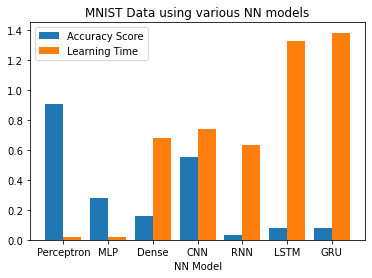

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

x = ['Perceptron', 'MLP', 'Dense', 'CNN', 'RNN', 'LSTM', 'GRU']
AccScore = [P_MNIST_score, MLP_MNIST_score, FC_MNIST_score, CNN_MNIST_score, RNN_MNIST_score, LSTM_MNIST_score, GRU_MNIST_score]
LearnTime=[p_learnTime, mlp_learnTime, FC_learnTime, CNN_learnTime, RNN_learnTime, LSTM_learnTime, GRU_learnTime]
x_pos = np.arange(len(x))


plt.bar(x_pos - 0.2, AccScore, 0.4, label = 'Accuracy Score')
plt.bar(x_pos + 0.2, LearnTime, 0.4, label = 'Learning Time')
  
plt.xticks(x_pos, x)
plt.xlabel("NN Model")
plt.title("MNIST Data using various NN models")
plt.legend()
plt.show()

This is not an apple to apple comparison, as every model has more properties and hyperparameters that have been fine-tuned to perform at its best. These experiments need to be repeated using different datasets (text and sequential time series to show test the spatial (2D and 3D) vs temperoal dependency (1D)), more complex (this was MNIST 8x8 pixels), more layers, more channels or units, use regularisation, more ephochs, ... and so forth.

The best way to compare all models is to define a particular acceptable accuracy score, and select the minimum parameter's values that achieves this accuracy score. Such that we say RNN converged (reached 90% accuracy) after xx epochs, using these parameter values and compare with the other models.

## Tensorised NN

There are many public domain examples for compressed NN using Tensor decomposition approaches.

- https://github.com/tensorly/Proceedings_IEEE_companion_notebooks/blob/master/tt-compression.ipynb
-  https://github.com/tensorly/Proceedings_IEEE_companion_notebooks/blob/master/tensor_regression_layer.ipynb 

- https://github.com/uwjunqi/TTN-VQC

### RNN

- https://github.com/Tuyki/TT_RNN

- https://tednet.readthedocs.io/en/latest/tutorials/tr_rnn.html

### FC/Dense

- https://github.com/timgaripov/TensorNet-TF/tree/master/experiments/cifar-10/FC-Tensorizing-Neural-Networks

- https://t3f.readthedocs.io/en/latest/tutorials/tensor_nets.html

### CNN

- https://github.com/timgaripov/TensorNet-TF/tree/master/experiments/cifar-10/conv-Ultimate-Tensorization

- https://tednet.readthedocs.io/en/latest/tutorials/tr_cnn.html

### Transformer

- https://github.com/szhangtju/The-compression-of-Transformer

### GAN

- https://github.com/xwcao/TGAN

### Generative Models approximating probability functions and probabilistic graphical models 

- https://github.com/emstoudenmire/TNML (C language, based on TN contraction C library itensor)